# Diabetes Prediction

## Loading Dataset

In [36]:
import pandas as pd

In [37]:
data = pd.read_csv('diabetes_prediction_dataset.csv')
data.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


## Exploratory Data Analysis

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

### Exploring Feature Distributions

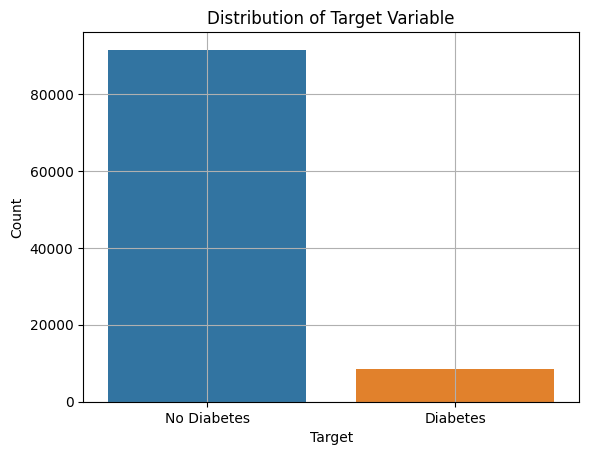

In [40]:
no_diabetes = data['diabetes'].value_counts()[0]
diabetes = data['diabetes'].value_counts()[1]
counts = [no_diabetes, diabetes]
targets = ['No Diabetes', 'Diabetes']
sns.barplot(x=targets, y=counts)
plt.grid()
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

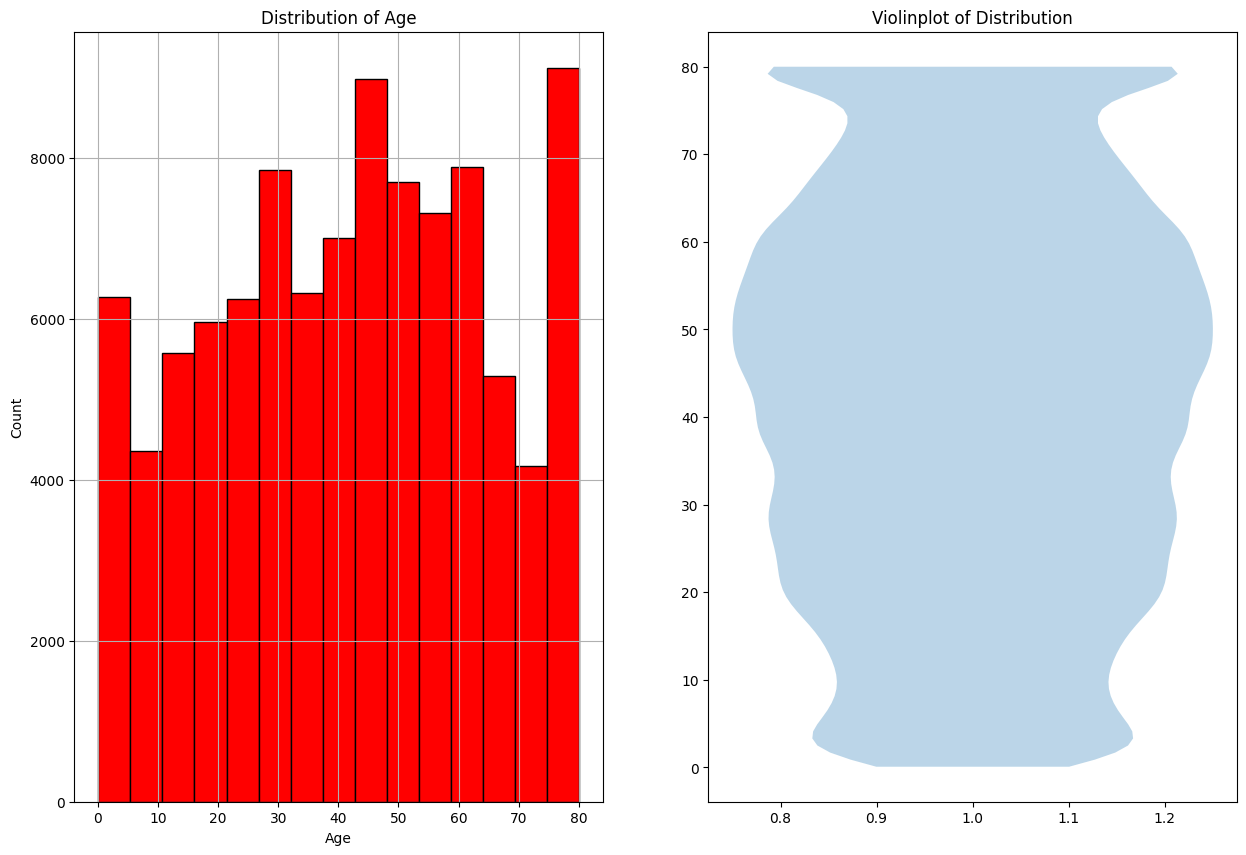

In [41]:
figure = plt.figure(figsize=(15, 10))
ax = figure.subplots(nrows=1, ncols=2)
ax[0].hist(x=data['age'], color='red', lw=1, ec='black', bins=15)
ax[0].set_title('Distribution of Age')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Count')
ax[0].grid()

ax[1].violinplot(data['age'], showextrema=False)
ax[1].set_title('Violinplot of Distribution')
plt.show()

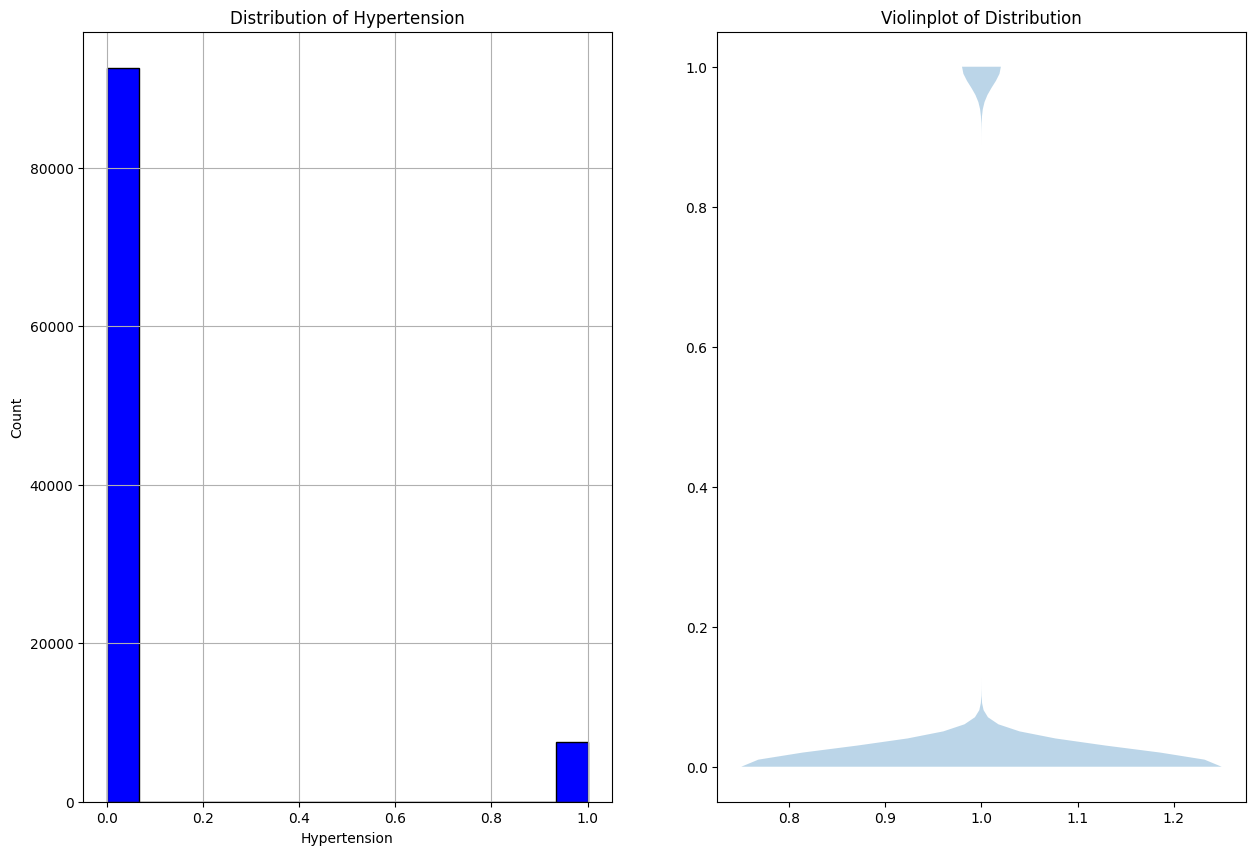

In [42]:
figure = plt.figure(figsize=(15, 10))
ax = figure.subplots(nrows=1, ncols=2)
ax[0].hist(x=data['hypertension'], color='blue', lw=1, ec='black', bins=15)
ax[0].set_title('Distribution of Hypertension')
ax[0].set_xlabel('Hypertension')
ax[0].set_ylabel('Count')
ax[0].grid()

ax[1].violinplot(data['hypertension'], showextrema=False)
ax[1].set_title('Violinplot of Distribution')
plt.show()

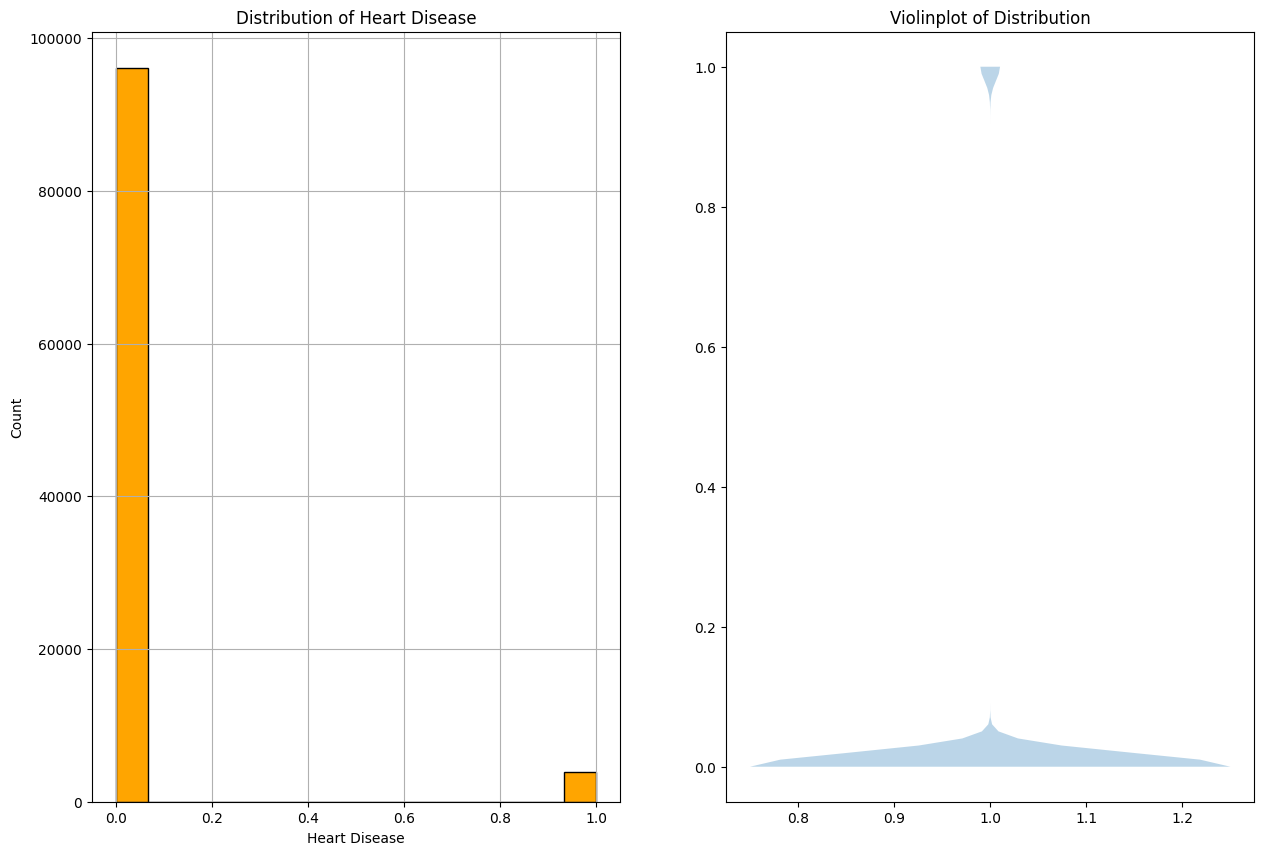

In [43]:
figure = plt.figure(figsize=(15, 10))
ax = figure.subplots(nrows=1, ncols=2)
ax[0].hist(x=data['heart_disease'], color='Orange', lw=1, ec='black', bins=15)
ax[0].set_title('Distribution of Heart Disease')
ax[0].set_xlabel('Heart Disease')
ax[0].set_ylabel('Count')
ax[0].grid()

ax[1].violinplot(data['heart_disease'], showextrema=False)
ax[1].set_title('Violinplot of Distribution')
plt.show()

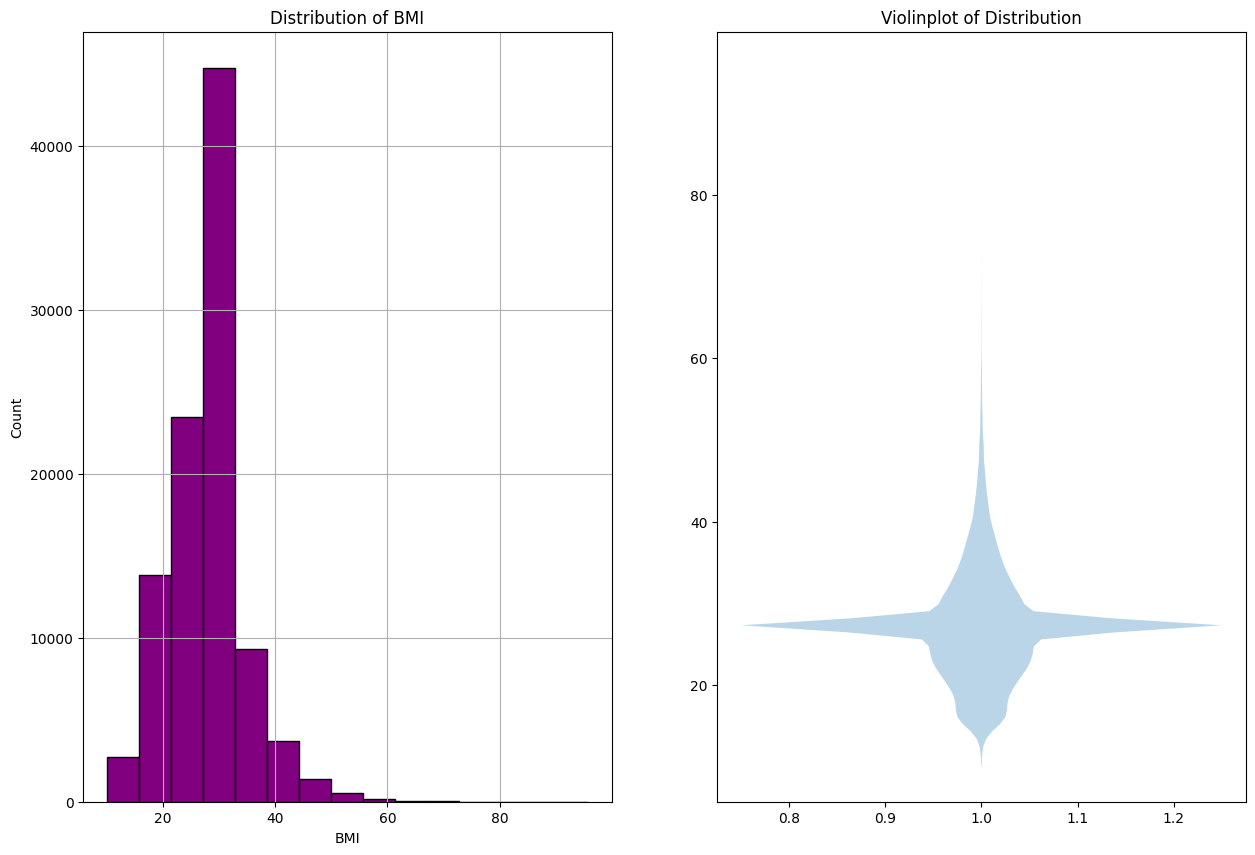

In [44]:
figure = plt.figure(figsize=(15, 10))
ax = figure.subplots(nrows=1, ncols=2)
ax[0].hist(x=data['bmi'], color='purple', lw=1, ec='black', bins=15)
ax[0].set_title('Distribution of BMI')
ax[0].set_xlabel('BMI')
ax[0].set_ylabel('Count')
ax[0].grid()

ax[1].violinplot(data['bmi'], showextrema=False)
ax[1].set_title('Violinplot of Distribution')
plt.show()

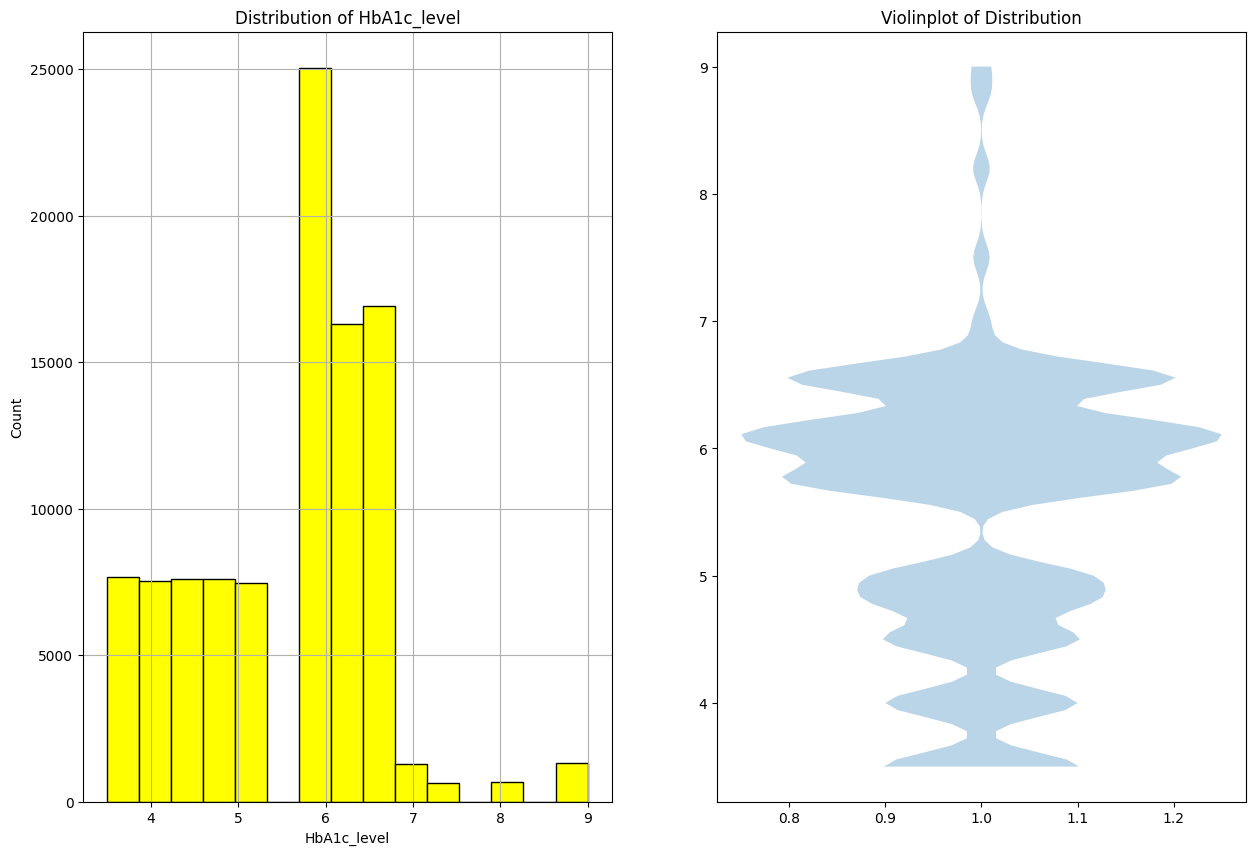

In [45]:
figure = plt.figure(figsize=(15, 10))
ax = figure.subplots(nrows=1, ncols=2)
ax[0].hist(x=data['HbA1c_level'], color='yellow', lw=1, ec='black', bins=15)
ax[0].set_title('Distribution of HbA1c_level')
ax[0].set_xlabel('HbA1c_level')
ax[0].set_ylabel('Count')
ax[0].grid()

ax[1].violinplot(data['HbA1c_level'], showextrema=False)
ax[1].set_title('Violinplot of Distribution')
plt.show()

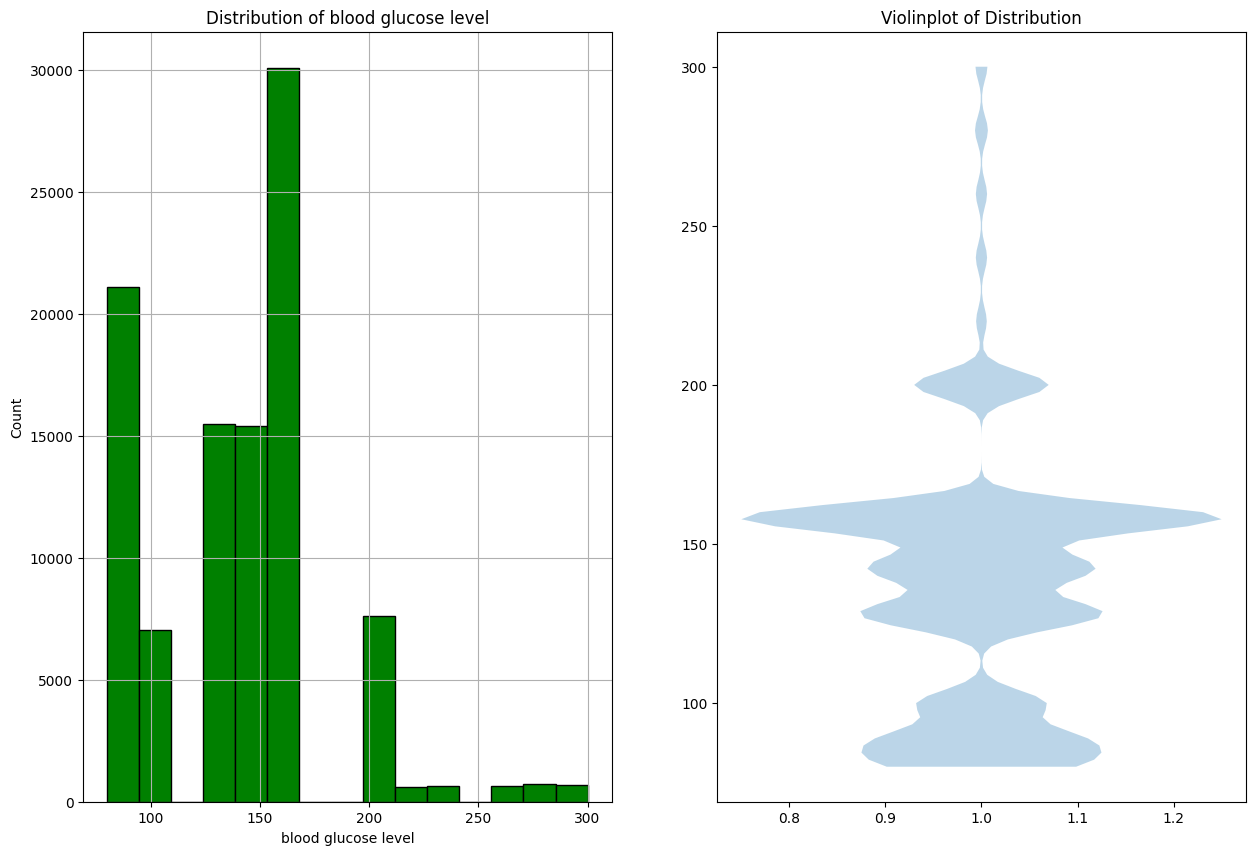

In [46]:
figure = plt.figure(figsize=(15, 10))
ax = figure.subplots(nrows=1, ncols=2)
ax[0].hist(x=data['blood_glucose_level'], color='green', lw=1, ec='black', bins=15)
ax[0].set_title('Distribution of blood glucose level')
ax[0].set_xlabel('blood glucose level')
ax[0].set_ylabel('Count')
ax[0].grid()

ax[1].violinplot(data['blood_glucose_level'], showextrema=False)
ax[1].set_title('Violinplot of Distribution')
plt.show()

### Exploring Relationships between Features and Target Variable

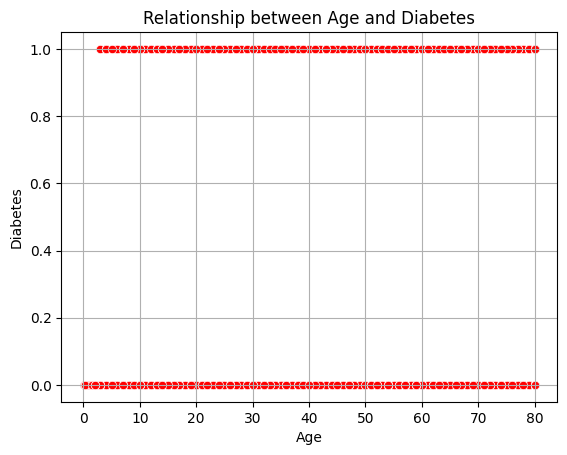

In [47]:
sns.scatterplot(data=data, x='age', y='diabetes', color='red')
plt.xlabel('Age')
plt.ylabel('Diabetes')
plt.title('Relationship between Age and Diabetes')
plt.grid()

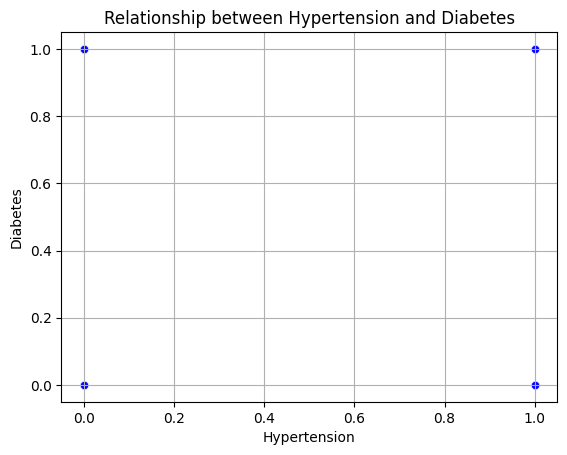

In [48]:
sns.scatterplot(data=data, x='hypertension', y='diabetes', color='blue')
plt.xlabel('Hypertension')
plt.ylabel('Diabetes')
plt.title('Relationship between Hypertension and Diabetes')
plt.grid()

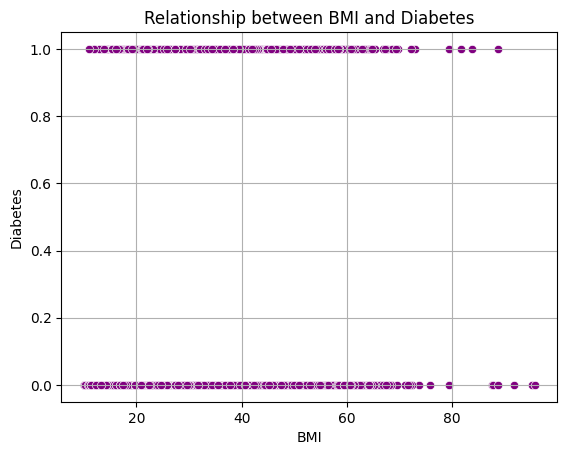

In [49]:
sns.scatterplot(data=data, x='bmi', y='diabetes', color='purple')
plt.xlabel('BMI')
plt.ylabel('Diabetes')
plt.title('Relationship between BMI and Diabetes')
plt.grid()

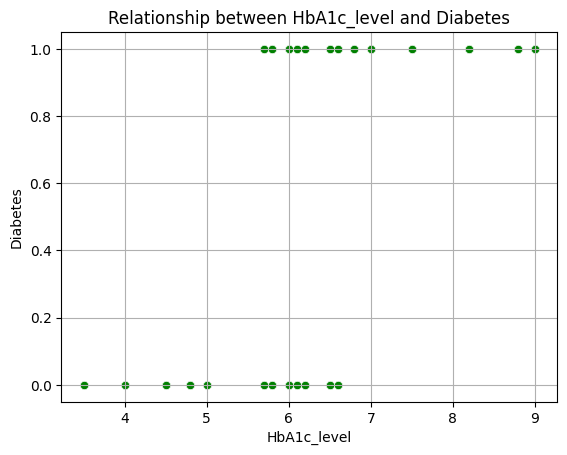

In [50]:
sns.scatterplot(data=data, x='HbA1c_level', y='diabetes', color='green')
plt.xlabel('HbA1c_level')
plt.ylabel('Diabetes')
plt.title('Relationship between HbA1c_level and Diabetes')
plt.grid()

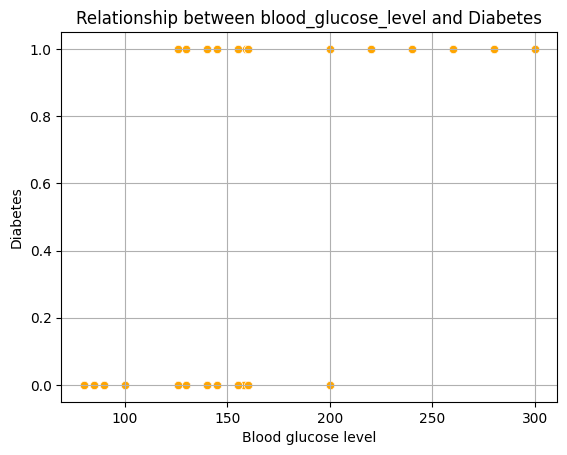

In [51]:
sns.scatterplot(data=data, x='blood_glucose_level', y='diabetes', color='orange')
plt.xlabel('Blood glucose level')
plt.ylabel('Diabetes')
plt.title('Relationship between blood_glucose_level and Diabetes')
plt.grid()

## Data Preprocessing

In [52]:
import numpy as np

In [53]:
data.loc[data["smoking_history"] == "No Info", "smoking_history"] = np.nan
data.loc[data['smoking_history'] == 'current', 'smoking_history'] = 1
data.loc[data['smoking_history'] == 'never', 'smoking_history'] = 0
data.loc[data['smoking_history'] == 'ever', 'smoking_history'] = 0
data.loc[data['smoking_history'] == 'not current', 'smoking_history'] = 0
data.loc[data['smoking_history'] == 'former', 'smoking_history'] = 2


data.loc[data['gender'] == 'Male', 'gender'] = 1
data.loc[data['gender'] == 'Female', 'gender'] = 0
data.loc[data['gender'] == 'Other', 'gender'] = 2

In [54]:
data = data.dropna()

In [55]:
best_features = ['age', 'hypertension', 'HbA1c_level', 'bmi', 'blood_glucose_level']

## Splitting the Data into Training and Test Sets

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X = data.drop(['diabetes'], axis=1)
y = data['diabetes']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

## Scaling the Data

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=scalar.get_feature_names_out())

X_test = scalar.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns=scalar.get_feature_names_out())

In [61]:
X_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,-0.805812,0.125766,-0.330451,-0.222303,-0.595257,2.650327,-1.888219,0.482338
1,-0.805812,0.841275,3.026164,-0.222303,-0.595257,-0.122392,-0.700040,1.430913
2,-0.805812,-0.794174,-0.330451,-0.222303,-0.595257,0.294974,-0.517243,-0.940525
3,-0.805812,0.023551,-0.330451,-0.222303,0.766805,0.584981,0.213943,-0.323951
4,-0.805812,1.710107,-0.330451,-0.222303,-0.595257,-1.391367,0.579537,0.458624


In [62]:
X_test.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,1.227494,0.742812,-0.325238,-0.221624,-0.593570,-0.141279,0.129224,-1.411481
1,1.227494,-1.161012,-0.325238,-0.221624,-0.593570,-0.781596,-0.688167,-1.292867
2,1.227494,0.331174,-0.325238,-0.221624,-0.593570,1.667580,2.399754,2.384160
3,1.227494,-0.286282,-0.325238,-0.221624,0.779341,2.524407,-0.506524,0.367726
4,1.227494,0.279720,-0.325238,-0.221624,-0.593570,-0.299438,0.220045,0.011884


## Creating the Model

In [63]:
from sklearn.ensemble import RandomForestClassifier

## Finding Best Hyperparameters

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB

### Random Forest Classifier

In [65]:
RFC_params = {
    'n_estimators' : [100, 200, 300, 400, 500],
    'criterion' : ["gini", "entropy", "log_loss"]
}

grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=RFC_params, cv=3)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [66]:
print(f'Best Params: {grid.best_params_}')
print(f'Best Score : {grid.best_score_}')

Best Params: {'criterion': 'entropy', 'n_estimators': 500}
Best Score : 0.9614777910068651


### Support Vector Machine

In [86]:
SVC_params = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']
}

svc_grid = GridSearchCV(SVC(), param_grid=SVC_params)
svc_grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [87]:
print(f'Best Params: {svc_grid.best_params_}')
print(f'Best Score : {svc_grid.best_score_}')

Best Params: {'kernel': 'poly'}
Best Score : 0.9536292371999446


## Finding Best Features

In [89]:
def backward_elimination(data, features, estimator):
    loop = True
    scores = []
    while loop:
        if len(features) == 2:
            break
        else:
            features = features[:-1]
            train = X_train[features]
            estimator.fit(train, y_train)
            score = estimator.score(train, y_train)
            scores.append(scores)
            print('Features Used : ', features)
            print('Score : ', score)
            print('---------------------->')

### Backwards Elimination Random Forest Classifier

In [90]:
backward_elimination(X_train, features=X_train.columns, estimator=RandomForestClassifier(n_estimators=500, criterion='entropy'))

Features Used :  Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level'],
      dtype='object')
Score :  0.9949364130328938
---------------------->
Features Used :  Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi'],
      dtype='object')
Score :  0.9824721989600171
---------------------->
Features Used :  Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history'], dtype='object')
Score :  0.8942294583909479
---------------------->
Features Used :  Index(['gender', 'age', 'hypertension', 'heart_disease'], dtype='object')
Score :  0.8920676962626833
---------------------->
Features Used :  Index(['gender', 'age', 'hypertension'], dtype='object')
Score :  0.8905680955070403
---------------------->
Features Used :  Index(['gender', 'age'], dtype='object')
Score :  0.8904707188345959
---------------------->


### Backwards Elimination Support Vector Classifier

In [92]:
backward_elimination(X_train, features=X_train.columns, estimator=SVC(kernel='poly'))

Features Used :  Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level'],
      dtype='object')
Score :  0.93072623522309
---------------------->
Features Used :  Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi'],
      dtype='object')
Score :  0.8904707188345959
---------------------->
Features Used :  Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history'], dtype='object')
Score :  0.8904707188345959
---------------------->
Features Used :  Index(['gender', 'age', 'hypertension', 'heart_disease'], dtype='object')
Score :  0.8904707188345959
---------------------->
Features Used :  Index(['gender', 'age', 'hypertension'], dtype='object')
Score :  0.8904707188345959
---------------------->
Features Used :  Index(['gender', 'age'], dtype='object')
Score :  0.8904707188345959
---------------------->


In [95]:
backward_elimination(X_train, features=X_train.columns, estimator=GaussianNB())

Features Used :  Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level'],
      dtype='object')
Score :  0.8752410072642998
---------------------->
Features Used :  Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi'],
      dtype='object')
Score :  0.8397764231600677
---------------------->
Features Used :  Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history'], dtype='object')
Score :  0.8413734005881551
---------------------->
Features Used :  Index(['gender', 'age', 'hypertension', 'heart_disease'], dtype='object')
Score :  0.8406722885465557
---------------------->
Features Used :  Index(['gender', 'age', 'hypertension'], dtype='object')
Score :  0.8507605118117904
---------------------->
Features Used :  Index(['gender', 'age'], dtype='object')
Score :  0.8904707188345959
---------------------->


### Conclusion
#### After running multiple test and grid searches I have concluded to use Random Forest Classifier as the model to work with and use the entirety of the features as well

## Evaluating the Model

In [67]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [97]:
model = RandomForestClassifier(n_estimators=500, criterion='entropy')
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

### Evaluation on Training Data

In [99]:
train_pred = model.predict(X_train)

In [101]:
train_f1 = f1_score(y_true=y_train, y_pred=train_pred)
print(f'F1 Score on Training Data : {train_f1:.2f}')

F1 Score on Training Data : 1.00


In [102]:
train_acc = accuracy_score(y_true=y_train, y_pred=train_pred)
print(f'Accuracy on Training Data : {train_acc:.2f}')

Accuracy on Training Data : 1.00


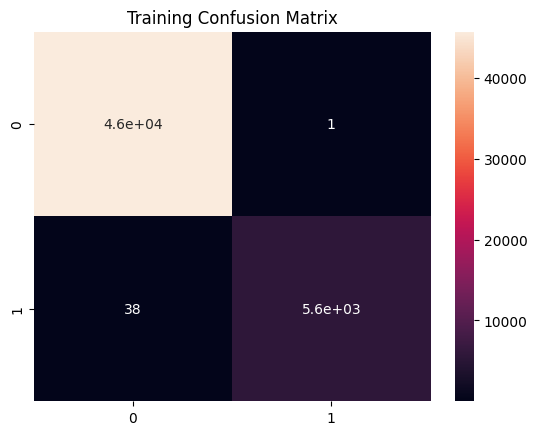

In [103]:
training_conf = confusion_matrix(y_true=y_train, y_pred=train_pred)
sns.heatmap(training_conf, annot=True)
plt.title('Training Confusion Matrix')
plt.show()

### Evaluation on Test Data

In [100]:
test_pred = model.predict(X_test)

In [104]:
test_f1 = f1_score(y_true=y_test, y_pred=test_pred)
print(f'F1 Score on Training Data : {test_f1:.2f}')

F1 Score on Training Data : 0.80


In [105]:
test_acc = accuracy_score(y_true=y_test, y_pred=test_pred)
print(f'Accuracy on Training Data : {test_acc:.2f}')

Accuracy on Training Data : 0.96


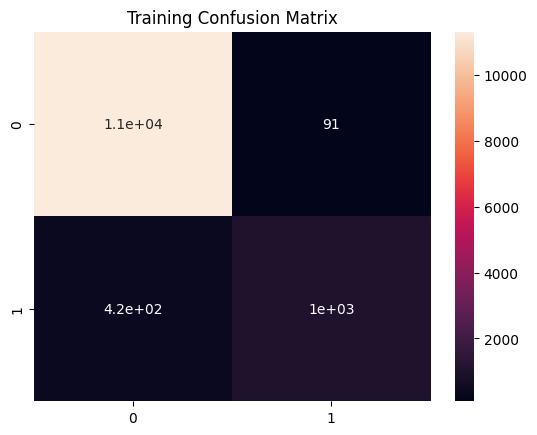

In [106]:
test_conf = confusion_matrix(y_true=y_test, y_pred=test_pred)
sns.heatmap(test_conf, annot=True)
plt.title('Training Confusion Matrix')
plt.show()

## Saving the Model

In [107]:
import joblib

In [108]:
joblib.dump(model, 'Diabetes_Model.pkl')

['Diabetes_Model.pkl']